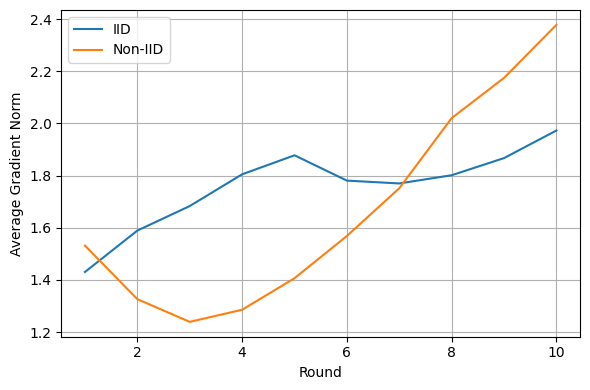

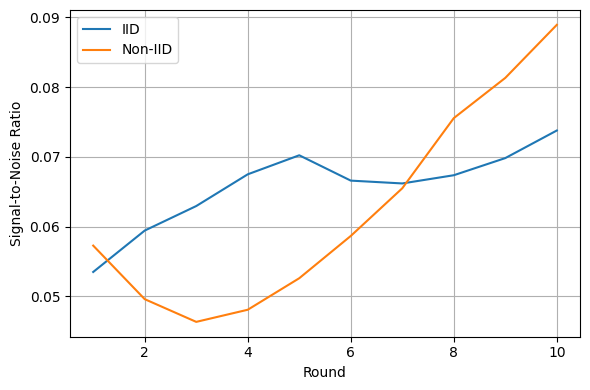

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load JSON files
iid_path = 'iid/dp_final_20250304_034644.json'
noniid_path = 'non-iid/dp_final_20250418_072754.json'

with open(iid_path) as f:
    iid_json = json.load(f)
with open(noniid_path) as f:
    noniid_json = json.load(f)

# Select the experiment with noise_multiplier_p1 = noise_multiplier_p2 = 1.0
exp_iid = next(exp for exp in iid_json['results']['experiments']
               if exp['noise_multiplier_p1'] == 1.0 and exp['noise_multiplier_p2'] == 1.0)
exp_noniid = next(exp for exp in noniid_json['results']['experiments']
                  if exp['noise_multiplier_p1'] == 1.0 and exp['noise_multiplier_p2'] == 1.0)

# Extract rounds
rounds = [r['round'] for r in exp_iid['rounds']]

# Compute per-round mean gradient and noise norms, and SNR (mean grad / mean noise)
grad_iid = [np.mean(r['dp_metrics']['avg_grad_norm']) for r in exp_iid['rounds']]
noise_iid = [np.mean(r['dp_metrics']['avg_noise_norm']) for r in exp_iid['rounds']]
snr_iid = [g / n if n != 0 else np.nan for g, n in zip(grad_iid, noise_iid)]

grad_noniid = [np.mean(r['dp_metrics']['avg_grad_norm']) for r in exp_noniid['rounds']]
noise_noniid = [np.mean(r['dp_metrics']['avg_noise_norm']) for r in exp_noniid['rounds']]
snr_noniid = [g / n if n != 0 else np.nan for g, n in zip(grad_noniid, noise_noniid)]

# Figure 1: Average Gradient Norm over Rounds
plt.figure(figsize=(6, 4))
plt.plot(rounds, grad_iid, label='IID')
plt.plot(rounds, grad_noniid, label='Non-IID')
plt.xlabel('Round')
plt.ylabel('Average Gradient Norm')
# plt.title('Average Gradient Norm over Rounds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('average_gradient_norm.png', dpi=300)
plt.show()

# Figure 2: Signal-to-Noise Ratio over Rounds
plt.figure(figsize=(6, 4))
plt.plot(rounds, snr_iid, label='IID')
plt.plot(rounds, snr_noniid, label='Non-IID')
plt.xlabel('Round')
plt.ylabel('Signal-to-Noise Ratio')
# plt.title('Signal-to-Noise Ratio over Rounds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('signal_to_noise_ratio.png', dpi=300)
plt.show()